In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

df = pd.read_csv('NYC_property_sales.csv')

T-Score: -0.67
P-Value: 0.51
Fail to reject null hypothesis: There is no significant difference between the sample and population means.
Sample Mean: 2076052.2
Difference between Population and Sample Mean: 355289.65
Z-Critical Value: 1.96
Confidence Interval: (1485034.87, 2667069.53)


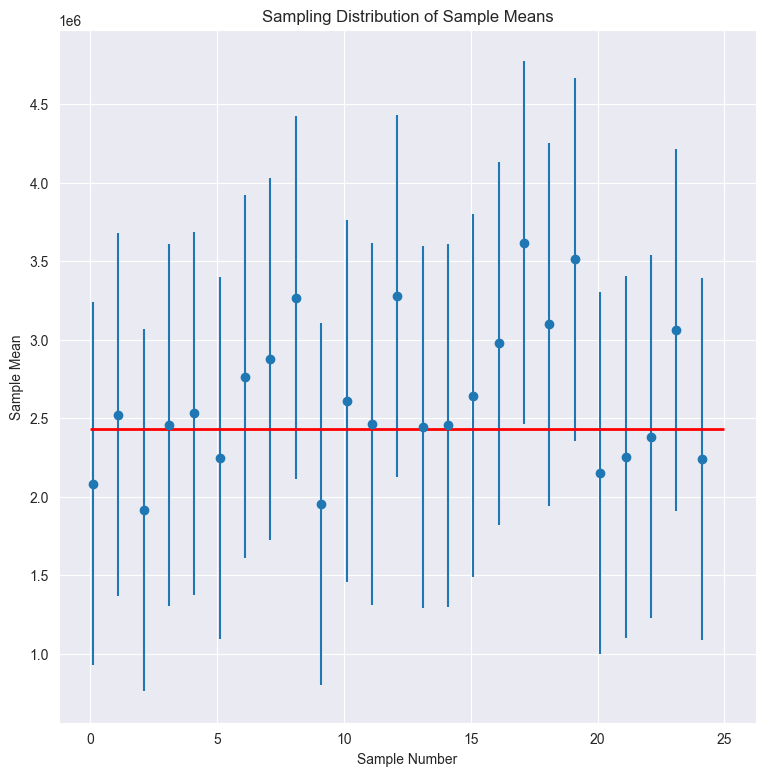

T-Score: -1.74
P-Value: 0.08
Fail to reject null hypothesis: There is no significant difference between the sample and population means.


In [137]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

def main():
    sale_price = df['sale_price'].to_numpy()
    
    np.random.seed(10)
    sample_size_percentage = 10  
    sample_size = int(len(df) * (sample_size_percentage / 100))
    sample_sale_price = np.random.choice(a=sale_price, size=sample_size)
    sample_mean = sample_sale_price.mean()
    
    print("Sample Mean:", round(sample_mean, 2))
    
    population_mean = sale_price.mean()
    difference = population_mean - sample_mean
    
    print("Difference between Population and Sample Mean:", round(difference, 2))
    
    z_critical = stats.norm.ppf(q=0.975)  
    
    print("Z-Critical Value:", round(z_critical, 2))
    
    pop_stdev = sale_price.std() 
    
    margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))
    
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    
    print("Confidence Interval:", tuple(round(val, 2) for val in confidence_interval))
    
    np.random.seed(12)

    sample_size = 1000
    
    intervals = []
    sample_means = []
    
    for sample in range(25):
        sample = np.random.choice(a=sale_price, size=sample_size)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)
    
        z_critical = stats.norm.ppf(q=0.975)  # Get the z-critical value*
    
        pop_stdev = sale_price.std()  # Get the population standard deviation
    
        margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))
    
        confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  
        
        intervals.append(confidence_interval)
        
    plt.figure(figsize=(9, 9))
    plt.errorbar(x=np.arange(0.1, 25, 1), 
                 y=sample_means, 
                 yerr=[abs((top - bot) / 2) for top, bot in intervals],
                 fmt='o')
    
    plt.hlines(xmin=0, xmax=25,
               y=population_mean, 
               linewidth=2.0,
               color="red")
    
    plt.title('Sampling Distribution of Sample Means')
    plt.xlabel('Sample Number')
    plt.ylabel('Sample Mean')
    
    plt.show()
    
    # Perform hypothesis testing
    hypothesis_testing(sample_sale_price, population_mean)

def hypothesis_testing(sample, population_mean, alpha=0.05):
    t_statistic, p_value = stats.ttest_1samp(a=sample, popmean=population_mean)
    
    print("T-Score:", round(t_statistic, 2))
    print("P-Value:", round(p_value, 2))
    
    if p_value < alpha:
        print("Reject null hypothesis: There is a significant difference between the sample and population means.")
    else:
        print("Fail to reject null hypothesis: There is no significant difference between the sample and population means.")

sample_size = 100
sample_data = np.random.normal(loc=50, scale=9, size=sample_size)  
population_mean = 50

# Call the hypothesis_testing function with generated data
hypothesis_testing(sample_data, population_mean)
main()


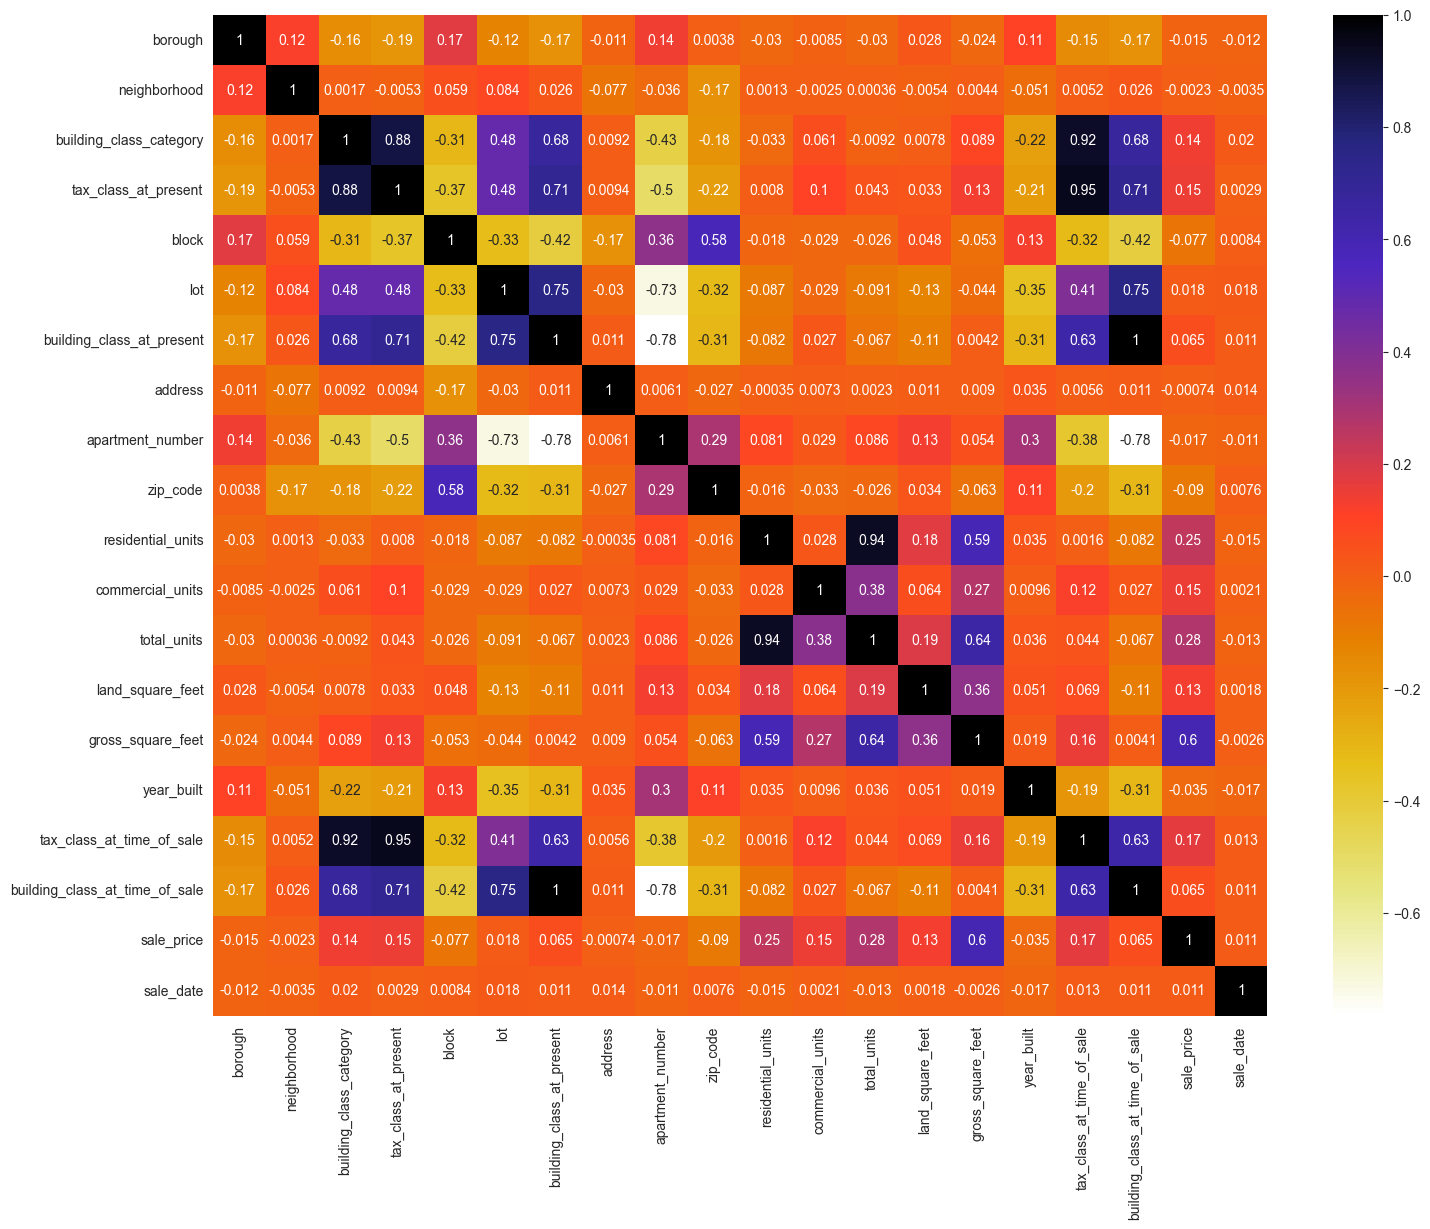

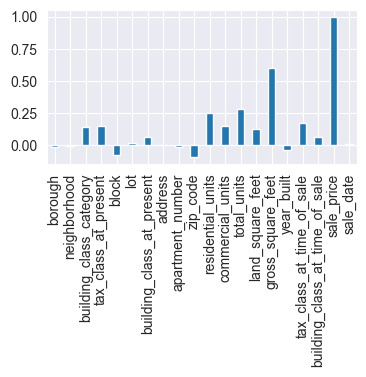

In [138]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])
    
correlation_matrix = df.corr()

plt.figure(figsize = (17,13))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

df.corr()['sale_price'][:].plot(figsize=(4,2), kind='bar')

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [146]:
correlation(df, 0.7)
cm = df.corr()
df.drop(columns=correlation(df, 0.7), inplace=True)
df.corr()['sale_price'][:].plot(figsize=(4,2), kind='bar')

plt.figure(figsize = (17,13))
sns.heatmap(cm, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

set()

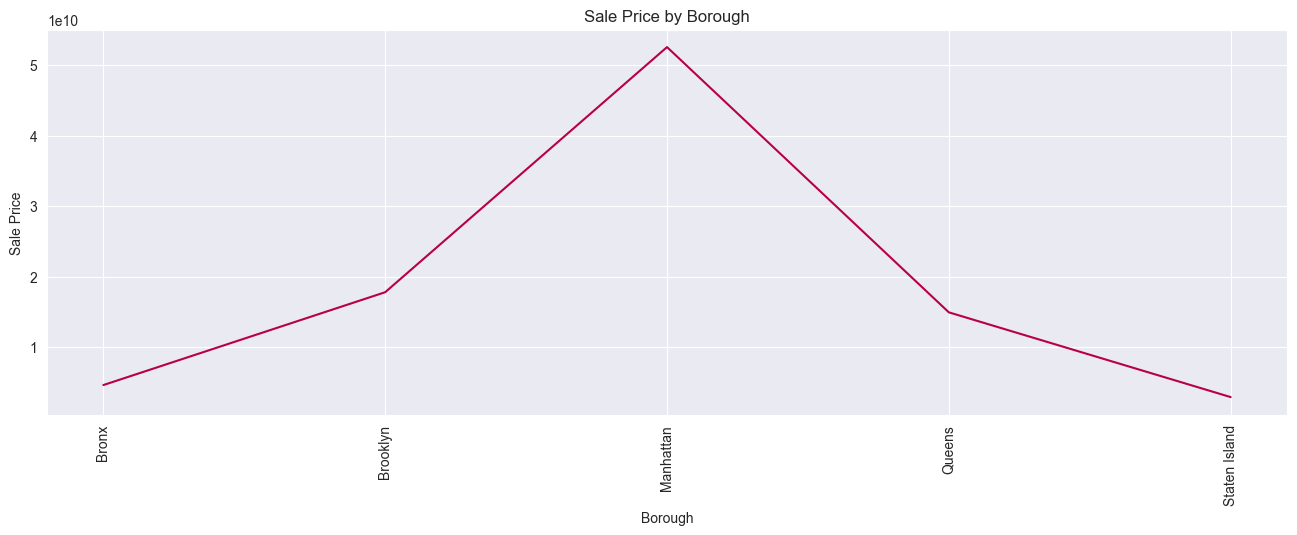

In [140]:
df_temp = df.groupby('borough').sale_price.sum().reset_index()
borough_map = {
    0: 'Bronx',
    1: 'Brooklyn',
    2: 'Manhattan',
    3: 'Queens',
    4: 'Staten Island'
}

df_temp['borough'] = df_temp['borough'].replace(borough_map)
plt.figure(figsize=(16, 5))

plt.plot(df_temp['borough'], df_temp['sale_price'], color='#b80045')

plt.xticks(rotation='vertical', size=10)

plt.xlabel('Borough')
plt.ylabel('Sale Price')
plt.title('Sale Price by Borough')

plt.show()

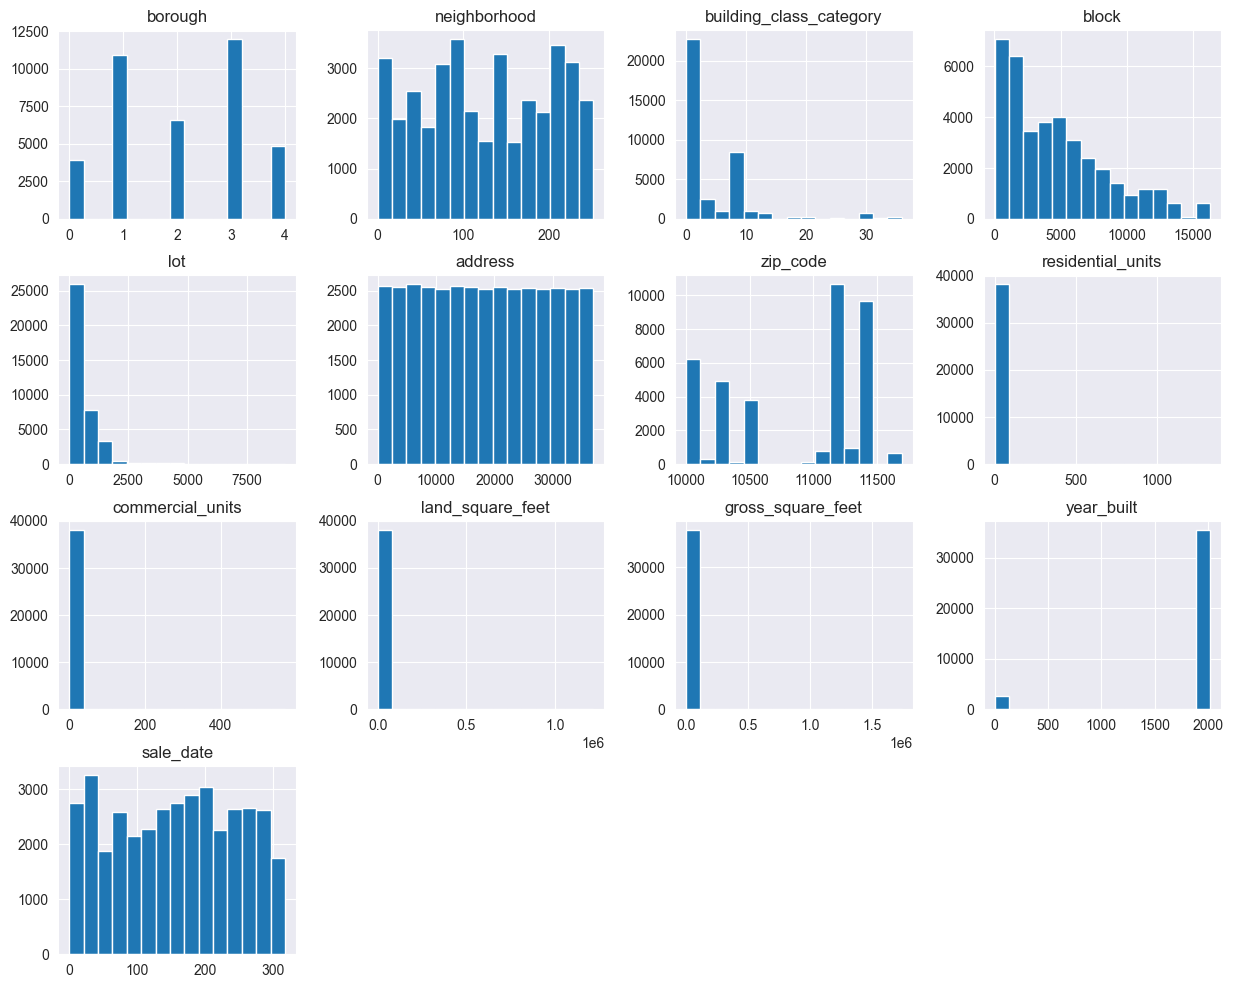

In [141]:
df_copy = df.copy()
X = df_copy.drop("sale_price",axis=1)   #Feature Matrix
X.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

Correlation Coefficient: 0.49922093011366775


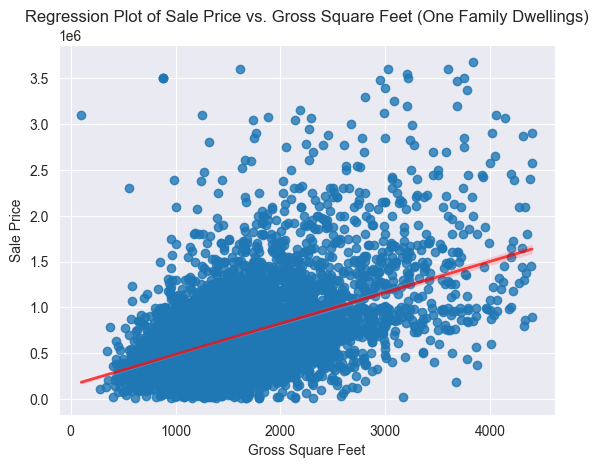

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Filter the DataFrame to include only "One Family Dwellings"
one_family_df = df[df['building_class_category'] == 0]

# Define the percentile cutoff for filtering outliers
gross_sq_ft_cutoff = one_family_df['gross_square_feet'].quantile(0.99)
sale_price_cutoff = one_family_df['sale_price'].quantile(0.99)

# Filter the one_family_df DataFrame to remove outliers
filtered_one_family_df = one_family_df[(one_family_df['gross_square_feet'] <= gross_sq_ft_cutoff) & (one_family_df['sale_price'] <= sale_price_cutoff)]

# Calculate correlation coefficient
corr_coef, _ = pearsonr(filtered_one_family_df['gross_square_feet'], filtered_one_family_df['sale_price'])
print("Correlation Coefficient:", corr_coef)

# Plot the regression line on the filtered data
sns.regplot(x='gross_square_feet', y='sale_price', data=filtered_one_family_df, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title('Regression Plot of Sale Price vs. Gross Square Feet (One Family Dwellings)')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.show()


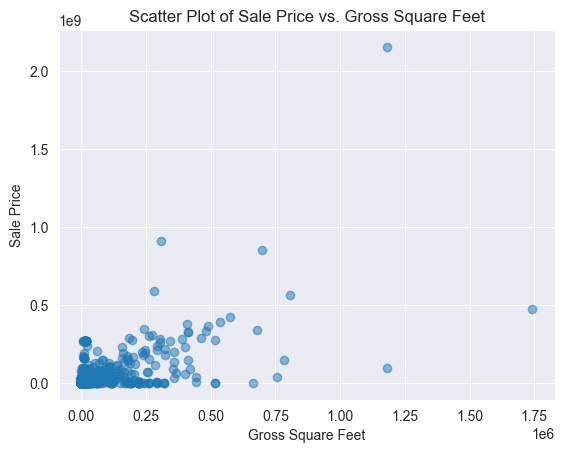

Correlation Coefficient: 0.599352662779092


C:\Users\Markus\OneDrive - BCIT\Desktop\term4\ACIT-4880-Introduction-to-Data-Analytics\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


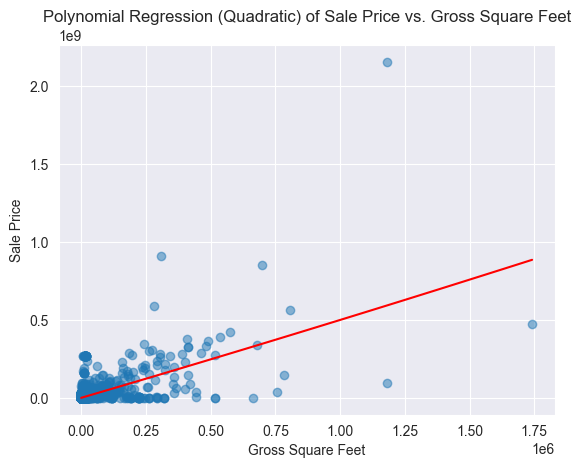

In [144]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Visual Inspection (Scatter Plot)
plt.scatter(df['gross_square_feet'], df['sale_price'], alpha=0.5)
plt.title('Scatter Plot of Sale Price vs. Gross Square Feet')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.show()

# Correlation Coefficient
correlation_coefficient, _ = pearsonr(df['gross_square_feet'], df['sale_price'])
print("Correlation Coefficient:", correlation_coefficient)

# Polynomial Regression (Quadratic)
X = df[['gross_square_feet']]
y = df['sale_price']

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Plot polynomial regression curve
plt.scatter(X, y, alpha=0.5)
plt.title('Polynomial Regression (Quadratic) of Sale Price vs. Gross Square Feet')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')

x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_poly_values = poly_features.transform(x_values)
y_pred = model.predict(x_poly_values)

plt.plot(x_values, y_pred, color='red')
plt.show()
